In [1]:
import pandas as pd


# Загрузка данных


In [2]:
import requests
from urllib.parse import urlencode

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/pnJkHYsLcYF9gQ'  

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

Создаем 2 датафрейма с данными из 2х листов одного файла

In [3]:
df1 = pd.read_excel(download_url, sheet_name='platform1')
df1.head(2)

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
0,81842,2023-09-26 14:45:42.910962,Апартаменты Baltia Западный Пляж,Apartment,Зеленоградск,"улица Приморская, д. 31, Зеленоградск",10.0,5.00,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,10595357,2023-09-26 20:56:02.013106,54.951103,20.456526
1,86341,2023-09-26 15:01:55.184815,Отель Авиатор,Hotel,Уфа,"улица Мушникова, д.28, Уфа",8.7,4.35,5,2,...,8.0,NaN,NaN,NaN,NaN,NaN,8332081,2023-09-26 20:56:02.013106,54.783913,56.116150


In [4]:
df2 = pd.read_excel(download_url, sheet_name='platfrom2')
df2.head(2)

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
0,4608,2023-09-14 15:46:07.855977,"Уют, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Аскинский рай...",NaN,NaN,NaN,2,...,5.0,NaN,NaN,NaN,NaN,NaN,70000001064499291,2023-09-14 22:44:57.013238,NaN,NaN
1,4815,2023-09-14 15:46:48.332492,Гостиница Ашкадар,NaN,sterlitamak,"Россия, Республика Башкортостан, Стерлитамак г...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,7600610350202940,2023-09-14 22:44:57.054250,NaN,NaN


df = pd.concat([df1,df2],  ignore_index=True)

In [5]:
def preprocessing(x):
    print(f'таблица имеет следующий вид:')
    display(x.head())
    print('*'*100)
    print(f'таблица имеет {x.shape[0]} сторок и {x.shape[1]} столбцов')
    print('*'*100)
    print(f'в таблице обнаружено дублекатов:{x.duplicated().sum()}')
    print('*'*100)
    print('в таблице обнаружены пропуски в следующих столбцах:')
    display(x.isna().sum())
    print('*'*100)
    print('Эти пропуски составлябт следующее количество в процентах')
    display((x.isna().mean()* 100).round(1))
    print('*'*100)
    print('столбцы имеют следующие типы:')
    display(x.dtypes)
    x.columns = [y.lower().replace(' ', '_') for y in x.columns.values] 
    print('*'*100)
    print('названия столбцов переписаны в нижнем регистре, пробелы заменены на нижнее подчеркивание')
    print('*'*100)
    display(x.info())

# Обработка данных из первой платформы

In [6]:
preprocessing(df1)

таблица имеет следующий вид:


,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
0,81842,2023-09-26 14:45:42.910962,Апартаменты Baltia Западный Пляж,Apartment,Зеленоградск,"улица Приморская, д. 31, Зеленоградск",10.0,5.00,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,10595357,2023-09-26 20:56:02.013106,54.951103,20.456526
1,86341,2023-09-26 15:01:55.184815,Отель Авиатор,Hotel,Уфа,"улица Мушникова, д.28, Уфа",8.7,4.35,5,2,...,8.0,NaN,NaN,NaN,NaN,NaN,8332081,2023-09-26 20:56:02.013106,54.783913,56.116150
2,86420,2023-09-26 15:02:12.005085,Клеопатра,Hotel,Уфа,"Коммунистическая ул., д. 53, Уфа",6.3,3.15,10,2,...,15.0,NaN,NaN,NaN,NaN,NaN,7724907,2023-09-26 20:56:02.013106,54.726463,55.946445
3,86421,2023-09-26 15:02:12.225334,Татьяна,Hotel,Сибай,"Учалинская улица, 37, Сибай",10.0,5.00,2,2,...,15.0,NaN,NaN,NaN,NaN,NaN,6598197,2023-09-26 20:56:02.013106,52.719230,58.658596
4,85898,2023-09-26 15:00:19.217359,Мини-Отель Чемодан,Mini-hotel,Стерлитамак,"улица Дружбы, д.28 Д, Стерлитамак",8.0,4.00,0,2,...,23.0,NaN,NaN,NaN,NaN,NaN,8622634,2023-09-26 20:56:02.013106,53.642567,55.932686


****************************************************************************************************
таблица имеет 5522 сторок и 21 столбцов
****************************************************************************************************
в таблице обнаружено дублекатов:0
****************************************************************************************************
в таблице обнаружены пропуски в следующих столбцах:


id                        0
create_time               0
title                     0
hotel_type_original       0
city                      0
address                   0
rating                    0
rating_5                  0
review_count              0
region                    0
star_rating            5211
rooms_count            4666
contact_social         5522
description            5522
email                  5522
phone                  5522
website                5522
uid                       0
parsing_time              0
lat                       0
lon                       0
dtype: int64

****************************************************************************************************
Эти пропуски составлябт следующее количество в процентах


id                       0.0
create_time              0.0
title                    0.0
hotel_type_original      0.0
city                     0.0
address                  0.0
rating                   0.0
rating_5                 0.0
review_count             0.0
region                   0.0
star_rating             94.4
rooms_count             84.5
contact_social         100.0
description            100.0
email                  100.0
phone                  100.0
website                100.0
uid                      0.0
parsing_time             0.0
lat                      0.0
lon                      0.0
dtype: float64

****************************************************************************************************
столбцы имеют следующие типы:


id                       int64
create_time             object
title                   object
hotel_type_original     object
city                    object
address                 object
rating                 float64
rating_5               float64
review_count             int64
region                   int64
star_rating            float64
rooms_count            float64
contact_social         float64
description            float64
email                  float64
phone                  float64
website                float64
uid                      int64
parsing_time            object
lat                    float64
lon                    float64
dtype: object

****************************************************************************************************
названия столбцов переписаны в нижнем регистре, пробелы заменены на нижнее подчеркивание
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5522 entries, 0 to 5521
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5522 non-null   int64  
 1   create_time          5522 non-null   object 
 2   title                5522 non-null   object 
 3   hotel_type_original  5522 non-null   object 
 4   city                 5522 non-null   object 
 5   address              5522 non-null   object 
 6   rating               5522 non-null   float64
 7   rating_5             5522 non-null   float64
 8   review_count         5522 non-null   int64  
 9   region               5522 non-null   int64  
 1

None

In [7]:
len_df1 = len(df1)
len_df1

5522

In [8]:
df1.title.nunique()

5258

In [9]:
df1.uid.nunique()

5522

In [10]:
t = df1.groupby('title')['id'].count().sort_values(ascending=False).reset_index()

In [11]:
t[t['id']>1].title.nunique()

175

In [12]:
t[t['id']>1]

,title,id
0,Апартаменты Infinity of Days,9
1,Апартаменты Apart-Deluxe Легенды Моря,8
2,Апартаменты у Моря,6
3,Апартаменты у Королевских Ворот,5
4,Апартаменты в центре города,5
...,...,...
170,Апартаменты DR Менделеева 128/1,2
171,Апартаменты Самый центр,2
172,Апартаменты на Аксакова 81,2
173,Апартаменты на Дадаева 66,2


In [13]:
df1.groupby('uid')['id'].count().sort_values(ascending=False).reset_index()

,uid,id
0,6292494,1
1,10199111,1
2,10209402,1
3,10209264,1
4,10209263,1
...,...,...
5517,9997638,1
5518,9997634,1
5519,9997602,1
5520,9997588,1


In [14]:
df1[df1['title']=='Апартаменты на Октябрьской']

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
1888,82242,2023-09-26 14:47:10.411687,Апартаменты на Октябрьской,Apartment,Зеленоградск,"улица Октябрьская, д.23, Зеленоградск",10.0,5.0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,10002709,2023-09-26 20:56:02.013106,54.962770,20.484226
2459,82819,2023-09-26 14:49:14.652647,Апартаменты на Октябрьской,Apartment,Калининград,"улица Октябрьская, д.57, Калининград",10.0,5.0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,8847461,2023-09-26 20:56:02.013106,54.700096,20.519098
3032,83394,2023-09-26 14:51:19.890314,Апартаменты на Октябрьской,Apartment,Зеленоградск,"улица Октябрьская, д. 25, Зеленоградск",9.6,4.8,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,10652660,2023-09-26 20:56:02.013106,54.962936,20.483727


In [15]:
df1[df1['title']=='Апартаменты на Гагарина']

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
1408,85520,2023-09-26 14:58:58.383038,Апартаменты на Гагарина,Apartment,Калининград,"улица Юрия Гагарина, д. 16Б, Калининград",0.0,0.00,0,2,...,1.0,NaN,NaN,NaN,NaN,NaN,6848890,2023-09-26 20:56:02.013106,54.718513,20.543240
1554,81902,2023-09-26 14:45:55.843097,Апартаменты на Гагарина,Apartment,Калининград,"улица Юрия Гагарина, д. 16В, корп. 3, Калининград",8.6,4.30,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,9993356,2023-09-26 20:56:02.013106,54.719500,20.544048
1620,81969,2023-09-26 14:46:10.747489,Апартаменты на Гагарина,Apartment,Калининград,"улица Юрия Гагарина, д. 16Б, Калининград",9.7,4.85,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,9996386,2023-09-26 20:56:02.013106,54.718506,20.543312


Пропустиить значения мы можем только в столбцах `star_rating` и `rooms_count`, поэтому заменяем их на средние значения сгруппированных по названию отелей значениям

In [16]:
def rooms_count_find(x):
    return df1[df1['title']==x]['rooms_count'].mean()    
df1['rooms_count'] = df1['title'].apply(rooms_count_find)

In [17]:
def star_rating_find(x):
    return df1[df1['title']==x]['star_rating'].mean()    
df1['star_rating'] = df1['title'].apply(star_rating_find)

In [18]:
df1[df1['title']=='Апартаменты на Гагарина']

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
1408,85520,2023-09-26 14:58:58.383038,Апартаменты на Гагарина,Apartment,Калининград,"улица Юрия Гагарина, д. 16Б, Калининград",0.0,0.00,0,2,...,1.0,NaN,NaN,NaN,NaN,NaN,6848890,2023-09-26 20:56:02.013106,54.718513,20.543240
1554,81902,2023-09-26 14:45:55.843097,Апартаменты на Гагарина,Apartment,Калининград,"улица Юрия Гагарина, д. 16В, корп. 3, Калининград",8.6,4.30,0,2,...,1.0,NaN,NaN,NaN,NaN,NaN,9993356,2023-09-26 20:56:02.013106,54.719500,20.544048
1620,81969,2023-09-26 14:46:10.747489,Апартаменты на Гагарина,Apartment,Калининград,"улица Юрия Гагарина, д. 16Б, Калининград",9.7,4.85,0,2,...,1.0,NaN,NaN,NaN,NaN,NaN,9996386,2023-09-26 20:56:02.013106,54.718506,20.543312


In [19]:
len(df1)

5522

In [20]:
df1 = df1.drop_duplicates(subset=['title'], keep='last', ignore_index=True)

In [21]:
df1[df1['title']=='Апартаменты на Гагарина']

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
1522,81969,2023-09-26 14:46:10.747489,Апартаменты на Гагарина,Apartment,Калининград,"улица Юрия Гагарина, д. 16Б, Калининград",9.7,4.85,0,2,...,1.0,NaN,NaN,NaN,NaN,NaN,9996386,2023-09-26 20:56:02.013106,54.718506,20.543312


In [22]:
len(df1)

5258

In [23]:
df1.title.nunique()

5258

In [24]:
len_df1 - len(df1)

264

In [25]:
t = df1.groupby('title')['id'].count().sort_values(ascending=False).reset_index()

In [26]:
t[t['id']>1]

,title,id


Все имена отелей взятые из первой платформы уникальны и не повторяются. Было удалено 264 дублируемых записей

In [27]:
xx = df1.sort_values('review_count',ascending=False).title.head(10).reset_index()
xx.title.unique()

array(['Radisson Blu Hotel Kaliningrad', 'AZIMUT Сити Отель Уфа',
       'Отель Кайзерхоф (Kaiserhof)', 'Отель Ibis Калининград Центр',
       'Hilton Garden Inn Ufa Riverside', 'Отель АМАКС Сити-отель',
       'Отель Hampton by Hilton Уфа',
       'Гостиничный Комплекс Президент Отель',
       'Гостиница Мартон Палас Калининград', 'Гостиница "Шкиперская"'],
      dtype=object)

In [28]:
df1[['title', 'review_count']].sort_values('review_count',ascending=False).head(10)

,title,review_count
1631,Radisson Blu Hotel Kaliningrad,1201
8,AZIMUT Сити Отель Уфа,988
1709,Отель Кайзерхоф (Kaiserhof),930
5221,Отель Ibis Калининград Центр,837
5,Hilton Garden Inn Ufa Riverside,616
11,Отель АМАКС Сити-отель,540
6,Отель Hampton by Hilton Уфа,460
180,Гостиничный Комплекс Президент Отель,414
5218,Гостиница Мартон Палас Калининград,334
1483,"Гостиница ""Шкиперская""",302


топ 10 гостиниц с первой платформы по количеству отзывов

топ 10 гостиниц из первой платформы по количетву телефонов нет смысла искать, так как у первой платформы в номерах телефонов 100 % пропусков

# Обработка данных из второй платформы

In [29]:
preprocessing(df2)

таблица имеет следующий вид:


,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
0,4608,2023-09-14 15:46:07.855977,"Уют, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Аскинский рай...",NaN,NaN,NaN,2,...,5.0,NaN,NaN,NaN,NaN,NaN,70000001064499291,2023-09-14 22:44:57.013238,NaN,NaN
1,4815,2023-09-14 15:46:48.332492,Гостиница Ашкадар,NaN,sterlitamak,"Россия, Республика Башкортостан, Стерлитамак г...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,7600610350202940,2023-09-14 22:44:57.054250,NaN,NaN
2,4750,2023-09-14 15:46:35.659931,"Островок, база отдыха",hotel_rest,NaN,"Россия, Республика Башкортостан, Гафурийский р...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,70000001076845858,2023-09-14 22:44:57.043234,NaN,NaN
3,4786,2023-09-14 15:46:42.672665,"Ардан, база отдыха",hotel_rest,NaN,"Россия, Республика Башкортостан, Баймакский ра...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,70000001075946655,2023-09-14 22:44:57.049244,NaN,NaN
4,16310,2023-09-15 11:56:48.785266,Гостиница,hotel,beloretsk,"Россия, Республика Башкортостан, Белорецкий ра...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,70000001031030911,2023-09-15 18:55:23.191778,53.969912,58.400557


****************************************************************************************************
таблица имеет 2767 сторок и 21 столбцов
****************************************************************************************************
в таблице обнаружено дублекатов:0
****************************************************************************************************
в таблице обнаружены пропуски в следующих столбцах:


id                        0
create_time               0
title                     0
hotel_type_original      20
city                   1145
address                   0
rating                  648
rating_5                648
review_count            648
region                    0
star_rating            2176
rooms_count            1105
contact_social         2261
description            2570
email                  2700
phone                  1691
website                2033
uid                       0
parsing_time              0
lat                     573
lon                     573
dtype: int64

****************************************************************************************************
Эти пропуски составлябт следующее количество в процентах


id                      0.0
create_time             0.0
title                   0.0
hotel_type_original     0.7
city                   41.4
address                 0.0
rating                 23.4
rating_5               23.4
review_count           23.4
region                  0.0
star_rating            78.6
rooms_count            39.9
contact_social         81.7
description            92.9
email                  97.6
phone                  61.1
website                73.5
uid                     0.0
parsing_time            0.0
lat                    20.7
lon                    20.7
dtype: float64

****************************************************************************************************
столбцы имеют следующие типы:


id                       int64
create_time             object
title                   object
hotel_type_original     object
city                    object
address                 object
rating                 float64
rating_5               float64
review_count           float64
region                   int64
star_rating            float64
rooms_count            float64
contact_social          object
description             object
email                   object
phone                   object
website                 object
uid                      int64
parsing_time            object
lat                    float64
lon                    float64
dtype: object

****************************************************************************************************
названия столбцов переписаны в нижнем регистре, пробелы заменены на нижнее подчеркивание
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2767 non-null   int64  
 1   create_time          2767 non-null   object 
 2   title                2767 non-null   object 
 3   hotel_type_original  2747 non-null   object 
 4   city                 1622 non-null   object 
 5   address              2767 non-null   object 
 6   rating               2119 non-null   float64
 7   rating_5             2119 non-null   float64
 8   review_count         2119 non-null   float64
 9   region               2767 non-null   int64  
 1

None

In [30]:
len_df2 = len(df2)
len_df2

2767

In [31]:
df2.title.nunique()

483

In [32]:
df2.uid.nunique()

549

In [33]:
t = df2.groupby('title')['id'].count().sort_values(ascending=False).reset_index()

In [34]:
t[t['id']>1].title.nunique()

483

Данные о всех гостиницах дублируются

In [35]:
t[t['id']>1]

,title,id
0,Гостиница,65
1,"Уют, гостиница",60
2,Мини-отель,20
3,Автобус в лесу,20
4,"Евразия, гостиница",20
...,...,...
478,"Восток1453, мотель",5
479,"Восток1453, гостиница",5
480,"ВолнаСити, отель",5
481,"Воздух, глэмпинг",5


In [36]:
df2[df2['title']=='Любизар, гостиница']

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
278,4528,2023-09-14 15:45:52.103983,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,NaN,NaN,NaN,NaN,NaN,70000001062965360,2023-09-14 22:44:56.995231,NaN,NaN
832,16139,2023-09-15 11:56:16.001027,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,NaN,NaN,NaN,NaN,NaN,70000001062965360,2023-09-15 18:55:23.190778,53.892723,56.467748
1382,67712,2023-09-29 15:26:40.837023,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,"[{""social"": ""vk"", ""contact"": ""https://vk.com/c...",NaN,NaN,+73474026959,NaN,70000001062965360,2023-09-29 22:24:07.344402,53.892723,56.467748
1851,29712,2023-09-15 16:49:45.725057,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,NaN,NaN,NaN,NaN,NaN,70000001062965360,2023-09-15 23:48:32.440373,53.892723,56.467748
2485,49567,2023-09-19 21:45:04.847796,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,"[{""social"": ""vk"", ""contact"": ""https://vk.com/c...",NaN,NaN,+73474026959,Забронировать,70000001062965360,2023-09-20 04:42:37.036551,53.892723,56.467748


In [37]:
df2[df2['title']=='Любизар, гостиница'].sort_values(['contact_social', 'email', 'phone', 'website',  'description', 'lat', 'lon'], ascending=False)

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
2485,49567,2023-09-19 21:45:04.847796,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,"[{""social"": ""vk"", ""contact"": ""https://vk.com/c...",NaN,NaN,+73474026959,Забронировать,70000001062965360,2023-09-20 04:42:37.036551,53.892723,56.467748
1382,67712,2023-09-29 15:26:40.837023,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,"[{""social"": ""vk"", ""contact"": ""https://vk.com/c...",NaN,NaN,+73474026959,NaN,70000001062965360,2023-09-29 22:24:07.344402,53.892723,56.467748
832,16139,2023-09-15 11:56:16.001027,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,NaN,NaN,NaN,NaN,NaN,70000001062965360,2023-09-15 18:55:23.190778,53.892723,56.467748
1851,29712,2023-09-15 16:49:45.725057,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,NaN,NaN,NaN,NaN,NaN,70000001062965360,2023-09-15 23:48:32.440373,53.892723,56.467748
278,4528,2023-09-14 15:45:52.103983,"Любизар, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",3.3,3.3,4.0,2,...,15.0,NaN,NaN,NaN,NaN,NaN,70000001062965360,2023-09-14 22:44:56.995231,NaN,NaN


In [38]:
len(df2)

2767

In [39]:
df2 = df2.drop_duplicates(subset=['title','address'], keep='last', ignore_index=True)

In [40]:
len(df2)

549

In [41]:
t = df2.groupby(['title', 'city'])['id'].count().sort_values(ascending=False).reset_index()

In [42]:
t[t['id']>1].title.nunique()

19

In [43]:
t[t['id']>1]

,title,city,id
0,Мини-отель,ufa,4
1,"By Richotels, хостел",ufa,3
2,Гостиница,ufa,3
3,"Вершина, гостиница",magnitogorsk,3
4,"Уютель, мини-отель",ufa,3
5,Гостевой дом,ufa,2
6,Гостиница,beloretsk,2
7,"Добрый день, гостиница",ufa,2
8,"Main room, хостел",ufa,2
9,"Гранд, отель",oktyabrskiy,2


In [44]:
df2[df2['title']=='By Richotels, хостел']

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
42,49328,2023-09-19 21:44:01.343612,"By Richotels, хостел",hotel,ufa,"Россия, Республика Башкортостан, Уфа городской...",4.5,4.5,193.0,2,...,NaN,"[{""social"": ""vk"", ""contact"": ""https://vk.com/u...",<br />•&nbsp;Единый кол-центр 24/7 подберёт дл...,"hostelrus.rb@gmail.com, hostelufa@richotels.ru",+79311065039,ufa.richotels.ru,70000001039482903,2023-09-20 04:41:34.335240,54.725326,55.932437
203,49498,2023-09-19 21:44:47.800168,"By Richotels, хостел",hotel,ufa,"Россия, Республика Башкортостан, Уфа городской...",4.1,4.1,66.0,2,...,NaN,"[{""social"": ""vk"", ""contact"": ""https://vk.com/u...",<br />•&nbsp;Единый кол-центр 24/7 подберёт дл...,hostelufa@richotels.ru,+79311065039,ufa.richotels.ru,70000001055705275,2023-09-20 04:42:18.773302,54.758810,56.007064
254,49554,2023-09-19 21:45:01.653710,"By Richotels, хостел",hotel,ufa,"Россия, Республика Башкортостан, Уфа городской...",4.5,4.5,217.0,2,...,NaN,"[{""social"": ""you_tube"", ""contact"": ""https://yo...",<br />•&nbsp;Единый кол-центр 24/7 подберёт дл...,hostelufa@richotels.ru,+79311065039,ufa.richotels.ru,70000001033236896,2023-09-20 04:42:33.583095,54.732719,55.946113


In [45]:
len(df2)

549

In [46]:
df2 = df2.drop_duplicates(subset=['title', 'city'], keep='last', ignore_index=True)

In [47]:
len(df2)

500

In [48]:
df2.groupby('title')['id'].count().sort_values(ascending=False).reset_index()

,title,id
0,Гостиница,4
1,"Уют, гостиница",3
2,"Евразия, гостиница",3
3,"Престиж, гостиница",2
4,"Ель, гостевой дом",2
...,...,...
478,"Виктория, гостиница",1
479,Визит,1
480,Вечный зов,1
481,"Вечер, гостиница",1


In [49]:
df2[df2['title']=='Вояж, гостиница']

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
143,49449,2023-09-19 21:44:35.391916,"Вояж, гостиница",hotel,NaN,"Россия, Республика Башкортостан, Мелеузовский ...",4.0,4.0,5.0,2,...,7.0,"[{""social"": ""vk"", ""contact"": ""https://vk.com/v...",NaN,NaN,+79677491500,Забронировать,70000001054813725,2023-09-20 04:42:05.905242,53.048502,56.444687
410,49749,2023-09-19 21:45:48.212646,"Вояж, гостиница",hotel,ufa,"Россия, Республика Башкортостан, Иглинский рай...",5.0,5.0,4.0,2,...,NaN,NaN,NaN,NaN,"+79871349915, +79173501010",NaN,70000001074945986,2023-09-20 04:43:25.132491,54.760899,56.390466


In [50]:
len_df2 - len(df2)

2267

Есть дублекаты в названии гостиниц, но данные гостиници из разных городов, имеют разный адрес

Всего удалено 2267 дублекатов

In [51]:
df2['phone'] = df2['phone'].str.replace('+', '', regex=True)

In [52]:
df2['website'] = df2['website'].str.replace('www.', '', regex=True).replace('https://', '', regex=True)

In [53]:
def split_fone(x):
    x = str(x)
    return x.split(',')
df2['phone'] = df2['phone'].apply(split_fone)

In [54]:
def count_fone(x):
    x = str(x)
    x = x.split(',')
    return len(x)
df2['len_phone'] = df2['phone'].apply(count_fone)

In [55]:
df2.sort_values('len_phone',ascending=False).title.head(10)

395                    Панорама, мини-отель
412                              Goldy Land
456                      Ивкор, база отдыха
466    Берлога на озере Калкан, база отдыха
108                    Орленок, апарт-отель
93                       Сказка, мини-отель
133             La Bereg, гостевой комплекс
50                  Добр здравич, гостиница
187                Межгорье, мини-гостиница
117                      Шале поляна, отель
Name: title, dtype: object

In [56]:
xx = df2.sort_values('len_phone',ascending=False).head(10).reset_index()
xx[['title', 'len_phone']]

,title,len_phone
0,"Панорама, мини-отель",6
1,Goldy Land,6
2,"Ивкор, база отдыха",5
3,"Берлога на озере Калкан, база отдыха",5
4,"Орленок, апарт-отель",4
5,"Сказка, мини-отель",4
6,"La Bereg, гостевой комплекс",4
7,"Добр здравич, гостиница",4
8,"Межгорье, мини-гостиница",4
9,"Шале поляна, отель",4


In [57]:
xx[['title', 'len_phone']].title.unique()

array(['Панорама, мини-отель', 'Goldy Land', 'Ивкор, база отдыха',
       'Берлога на озере Калкан, база отдыха', 'Орленок, апарт-отель',
       'Сказка, мини-отель', 'La Bereg, гостевой комплекс',
       'Добр здравич, гостиница', 'Межгорье, мини-гостиница',
       'Шале поляна, отель'], dtype=object)

топ 10 гостиниц со второй платформы по номерам телефонов

In [58]:
df2.sort_values('review_count',ascending=False).title.head(10)

43         Hilton Garden Inn Ufa Riverside, отель
40                 Башкирия, гостиничный комплекс
46                   Hampton by hilton Ufa, отель
45                 Урал тау, гостиничный комплекс
31                          AZIMUT Сити Отель Уфа
10                    Амакс Сити-отель, гостиница
42          Президент отель, гостиничный комплекс
41    Sheratonplaza Ufa Congress Hotel, гостиница
54                               ВолнаСити, отель
27                    Свояк, гостиничный комплекс
Name: title, dtype: object

In [59]:
xx = df2.sort_values('review_count',ascending=False).head(10).reset_index()
xx[['title', 'review_count']]

,title,review_count
0,"Hilton Garden Inn Ufa Riverside, отель",823.0
1,"Башкирия, гостиничный комплекс",780.0
2,"Hampton by hilton Ufa, отель",451.0
3,"Урал тау, гостиничный комплекс",416.0
4,AZIMUT Сити Отель Уфа,386.0
5,"Амакс Сити-отель, гостиница",358.0
6,"Президент отель, гостиничный комплекс",341.0
7,"Sheratonplaza Ufa Congress Hotel, гостиница",240.0
8,"ВолнаСити, отель",232.0
9,"Свояк, гостиничный комплекс",222.0


In [60]:
xx[['title', 'review_count']].title.unique()

array(['Hilton Garden Inn Ufa Riverside, отель',
       'Башкирия, гостиничный комплекс', 'Hampton by hilton Ufa, отель',
       'Урал тау, гостиничный комплекс', 'AZIMUT Сити Отель Уфа',
       'Амакс Сити-отель, гостиница',
       'Президент отель, гостиничный комплекс',
       'Sheratonplaza Ufa Congress Hotel, гостиница', 'ВолнаСити, отель',
       'Свояк, гостиничный комплекс'], dtype=object)

топ 10 гостиниц со второй платформы по количеству отзывов

In [61]:
df = pd.concat([df1,df2], ignore_index=True)

In [62]:
df

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,contact_social,description,email,phone,website,uid,parsing_time,lat,lon,len_phone
0,81842,2023-09-26 14:45:42.910962,Апартаменты Baltia Западный Пляж,Apartment,Зеленоградск,"улица Приморская, д. 31, Зеленоградск",10.0,5.00,0.0,2,...,NaN,NaN,NaN,NaN,NaN,10595357,2023-09-26 20:56:02.013106,54.951103,20.456526,NaN
1,86341,2023-09-26 15:01:55.184815,Отель Авиатор,Hotel,Уфа,"улица Мушникова, д.28, Уфа",8.7,4.35,5.0,2,...,NaN,NaN,NaN,NaN,NaN,8332081,2023-09-26 20:56:02.013106,54.783913,56.116150,NaN
2,86420,2023-09-26 15:02:12.005085,Клеопатра,Hotel,Уфа,"Коммунистическая ул., д. 53, Уфа",6.3,3.15,10.0,2,...,NaN,NaN,NaN,NaN,NaN,7724907,2023-09-26 20:56:02.013106,54.726463,55.946445,NaN
3,86421,2023-09-26 15:02:12.225334,Татьяна,Hotel,Сибай,"Учалинская улица, 37, Сибай",10.0,5.00,2.0,2,...,NaN,NaN,NaN,NaN,NaN,6598197,2023-09-26 20:56:02.013106,52.719230,58.658596,NaN
4,85898,2023-09-26 15:00:19.217359,Мини-Отель Чемодан,Mini-hotel,Стерлитамак,"улица Дружбы, д.28 Д, Стерлитамак",8.0,4.00,0.0,2,...,NaN,NaN,NaN,NaN,NaN,8622634,2023-09-26 20:56:02.013106,53.642567,55.932686,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,49848,2023-09-19 21:46:11.061452,"Караидель, физкультурно-оздоровительный комплекс",hotel_rest,NaN,"Россия, Республика Башкортостан, Караидельский...",NaN,NaN,NaN,2,...,"[{""social"": ""vk"", ""contact"": ""https://vk.com/c...",NaN,NaN,[73472827979],kara-idel.ru,70000001069863555,2023-09-20 04:43:50.769707,55.794670,56.864993,1.0
5754,49851,2023-09-19 21:46:11.764997,"Lounge villa, база отдыха",hotel_rest,NaN,"Россия, Республика Башкортостан, Туймазинский ...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,[79236157271],Забронировать,70000001069856457,2023-09-20 04:43:51.527665,54.434405,54.018789,1.0
5755,49852,2023-09-19 21:46:11.981114,"Лена, база отдыха",hotel_rest,NaN,"Россия, Республика Башкортостан, Илишевский ра...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,[79236157271],Забронировать,70000001069870275,2023-09-20 04:43:51.802655,55.288257,54.483841,1.0
5756,49853,2023-09-19 21:46:12.205246,База отдыха,hotel_rest,NaN,"Россия, Республика Башкортостан, Краснокамский...",NaN,NaN,NaN,2,...,"[{""social"": ""vk"", ""contact"": ""https://vk.com/s...",NaN,NaN,"[73478331555, 79236157271]",bazasauzovo.ru,70000001069866157,2023-09-20 04:43:52.091311,55.950944,53.791774,2.0


In [63]:
def test(x,y):
    return [x, y]
df['test'] = df.apply(lambda x: test(x.lat, x.lon), axis=1)

In [64]:
(50.7207-50.7117)/2

0.0045000000000001705

In [65]:
(20.4524-20.4369)/2

0.007749999999999702

In [66]:
def position(x):
    nums = 0
    for index, item in enumerate(df['test']):
        if item[0] <= (x[0]+0.0045) and item[0] >= (x[0]-0.0045) and item[1] <= (x[1]+0.0077) and item[1] >= (x[1]-0.0077):
            nums+=1
    return nums
df['count_gost'] = df['test'].apply(position)
df.sort_values('count_gost',ascending=False).head(60)

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,email,phone,website,uid,parsing_time,lat,lon,len_phone,test,count_gost
2344,82873,2023-09-26 14:49:26.201114,Гостевой дом Райзен Хаус,Guesthouse,Зеленоградск,"улица Лермонтова, д.9 А, Зеленоградск",9.4,4.70,0.0,2,...,NaN,NaN,NaN,8854429,2023-09-26 20:56:02.013106,54.959260,20.489283,NaN,"[54.95926, 20.489283]",279
3525,84132,2023-09-26 14:54:00.667660,Дом Таунхаус у парка,Cottages_and_Houses,Зеленоградск,"улица Лермонтова 2в, Зеленоградск",8.5,4.25,0.0,2,...,NaN,NaN,NaN,9996779,2023-09-26 20:56:02.013106,54.960530,20.489376,NaN,"[54.96053, 20.489376]",277
1367,81790,2023-09-26 14:45:31.462609,Апартаменты В Зеленоградске у Моря,Apartment,Зеленоградск,"улица Лермонтова, д. 11, Зеленоградск",9.9,4.95,0.0,2,...,NaN,NaN,NaN,10019454,2023-09-26 20:56:02.013106,54.960102,20.489466,NaN,"[54.960102, 20.489466]",276
4078,84709,2023-09-26 14:56:05.088718,Апартаменты на Лермонтова,Apartment,Зеленоградск,"улица Лермонтова, д. 4А, Зеленоградск",0.0,0.00,0.0,2,...,NaN,NaN,NaN,10480551,2023-09-26 20:56:02.013106,54.960358,20.489641,NaN,"[54.960358, 20.489641]",276
4968,85637,2023-09-26 14:59:22.662617,Guest House Trigona,Guesthouse,Зеленоградск,"Ulitsa Lermontova 5a, 238326 Zelenogradsk, Rus...",0.0,0.00,3.0,2,...,NaN,NaN,NaN,6719101,2023-09-26 20:56:02.013106,54.959423,20.489948,NaN,"[54.959423, 20.489948]",270
2770,83325,2023-09-26 14:51:04.814362,Мини-отель Lermontovskiy apart,Mini-hotel,Зеленоградск,"улица Лермонтова, д.4Д, Зеленоградск",9.1,4.55,0.0,2,...,NaN,NaN,NaN,10467382,2023-09-26 20:56:02.013106,54.960175,20.489988,NaN,"[54.960175, 20.489988]",269
2675,83225,2023-09-26 14:50:42.970196,Апартаменты Соммера 12,Apartment,Калининград,"улица Генерала Соммера, д. 12, Калининград",7.2,3.60,0.0,2,...,NaN,NaN,NaN,10016145,2023-09-26 20:56:02.013106,54.715775,20.506355,NaN,"[54.715775, 20.506355]",262
2318,82847,2023-09-26 14:49:20.669013,Апартаменты Sommera Center,Apartment,Калининград,"улица Генерала Соммера, д.10, Калининград",9.9,4.95,0.0,2,...,NaN,NaN,NaN,10210905,2023-09-26 20:56:02.013106,54.715630,20.505842,NaN,"[54.71563, 20.505842]",262
1937,82429,2023-09-26 14:47:50.675915,Апартаменты в центре Калининграда 1,Apartment,Калининград,"улица Генерала Соммера, д.10, Калининград",0.0,0.00,0.0,2,...,NaN,NaN,NaN,10618164,2023-09-26 20:56:02.013106,54.715630,20.505842,NaN,"[54.71563, 20.505842]",262
1375,81799,2023-09-26 14:45:33.406780,Апартаменты Двухкомнатные Рядом с Янтарной Шка...,Apartment,Калининград,"улица Генерала Соммера, д. 14, Калининград",9.8,4.90,0.0,2,...,NaN,NaN,NaN,10459031,2023-09-26 20:56:02.013106,54.715800,20.506527,NaN,"[54.7158, 20.506527]",261


<Axes: >

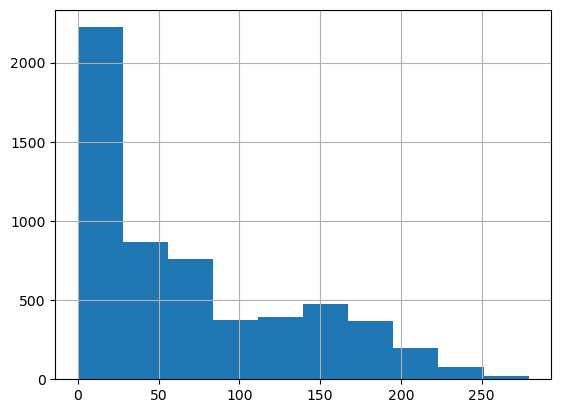

In [67]:
df.count_gost.hist()

In [68]:
df.sort_values('count_gost', ascending=False).head(2)

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,email,phone,website,uid,parsing_time,lat,lon,len_phone,test,count_gost
2344,82873,2023-09-26 14:49:26.201114,Гостевой дом Райзен Хаус,Guesthouse,Зеленоградск,"улица Лермонтова, д.9 А, Зеленоградск",9.4,4.70,0.0,2,...,NaN,NaN,NaN,8854429,2023-09-26 20:56:02.013106,54.95926,20.489283,NaN,"[54.95926, 20.489283]",279
3525,84132,2023-09-26 14:54:00.667660,Дом Таунхаус у парка,Cottages_and_Houses,Зеленоградск,"улица Лермонтова 2в, Зеленоградск",8.5,4.25,0.0,2,...,NaN,NaN,NaN,9996779,2023-09-26 20:56:02.013106,54.96053,20.489376,NaN,"[54.96053, 20.489376]",277


координаты центра пересечения диагоналей квадрата с наибольшей плотностью гостиниц: lat: 54.95926, lon: 20.489283

# Задачи со *

In [69]:
df2_title = df2.title.unique()
df2_title

array(['Уютный', 'Эдем', 'ИремельОтель, гостиничный комплекс',
       'Аэропорт aeropot hotel, гостиница', 'Тихорецкий, гостевой дом',
       'СЕМЬЯ, мини-гостиница', 'Маракеш, гостиница',
       'Якташлар, комплекс', 'Агидель, гостиница', 'Корона, отель',
       'Амакс Сити-отель, гостиница', 'Ай да вкус, гостиничный комплекс',
       'Уршак, гостиница', 'Огонек, гостиница',
       'Каменный цветок, гостевой дом', 'Новосел', 'Ургун, гостиница',
       'СТОКГОЛЬМ, мини-отель', 'Курай, гостиница',
       'Альфа, гостиничный комплекс',
       'Банная Усадьба, оздоровительный комплекс',
       'Лесная усадьба, эко-комплекс', 'Ашкадар, гостиница',
       'Гранд-Отель Восток, гостиница', 'Дарина, отель',
       'DEVONHOTEL, гостинично-ресторанный комплекс',
       'Байтуган, гостиница', 'Свояк, гостиничный комплекс',
       'Favorit, гостиница', 'Уфа-Астория, гостиница',
       'Корона, гостиница', 'AZIMUT Сити Отель Уфа', '7Days',
       'Ural Taur, гостиничный комплекс',
       'Посадская

In [70]:
df1_unique_title = df1[~(df1['title'].isin(df2_title))]
df1_unique_title

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
0,81842,2023-09-26 14:45:42.910962,Апартаменты Baltia Западный Пляж,Apartment,Зеленоградск,"улица Приморская, д. 31, Зеленоградск",10.0,5.00,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,10595357,2023-09-26 20:56:02.013106,54.951103,20.456526
1,86341,2023-09-26 15:01:55.184815,Отель Авиатор,Hotel,Уфа,"улица Мушникова, д.28, Уфа",8.7,4.35,5,2,...,8.0,NaN,NaN,NaN,NaN,NaN,8332081,2023-09-26 20:56:02.013106,54.783913,56.116150
2,86420,2023-09-26 15:02:12.005085,Клеопатра,Hotel,Уфа,"Коммунистическая ул., д. 53, Уфа",6.3,3.15,10,2,...,15.0,NaN,NaN,NaN,NaN,NaN,7724907,2023-09-26 20:56:02.013106,54.726463,55.946445
3,86421,2023-09-26 15:02:12.225334,Татьяна,Hotel,Сибай,"Учалинская улица, 37, Сибай",10.0,5.00,2,2,...,15.0,NaN,NaN,NaN,NaN,NaN,6598197,2023-09-26 20:56:02.013106,52.719230,58.658596
4,85898,2023-09-26 15:00:19.217359,Мини-Отель Чемодан,Mini-hotel,Стерлитамак,"улица Дружбы, д.28 Д, Стерлитамак",8.0,4.00,0,2,...,23.0,NaN,NaN,NaN,NaN,NaN,8622634,2023-09-26 20:56:02.013106,53.642567,55.932686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,86744,2023-09-26 15:03:21.089955,Podushka Hostel,Hostel,Уфа,"Ulitsa Lenina, 9/11, 3, flat 24, Ufa, Russia, Уфа",7.5,3.75,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,8661195,2023-09-26 20:56:02.013106,54.727528,55.947640
5254,86790,2023-09-26 15:03:30.721937,Lux apartament UFA,Apartment,Уфа,"Ulitsa Mingazheva 102, 450078 Ufa, Russia, Уфа",0.0,0.00,0,2,...,1.0,NaN,NaN,NaN,NaN,NaN,6297197,2023-09-26 20:56:02.013106,54.727356,55.968070
5255,87120,2023-09-26 15:04:39.726907,Биатлон,Hotel,Уфа,"ул. Комарова 1, Уфа",0.0,0.00,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,8753471,2023-09-26 20:56:02.013106,54.805300,56.036000
5256,87165,2023-09-26 15:04:49.051042,Лидо,Hotel,Уфа,"ул. Менделеева, д. 160/3, Уфа",0.0,0.00,21,2,...,18.0,NaN,NaN,NaN,NaN,NaN,7887775,2023-09-26 20:56:02.013106,54.737904,56.029900


In [71]:
df1_unique_title[df1_unique_title['title']=='Авиатор, гостиница']

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon


In [72]:
df1_unique_title.title.nunique()

5250

В данных с первой платформы присутствуют данные о 5250 гостиницах, которых нет в данных из второй платформы

In [73]:
df1_df2_onli_title = df1[(df1['title'].isin(df2_title))]
df1_df2_onli_title

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,rooms_count,contact_social,description,email,phone,website,uid,parsing_time,lat,lon
8,85902,2023-09-26 15:00:20.095657,AZIMUT Сити Отель Уфа,Hotel,Уфа,"пр-т Октября, д. 81, Уфа",8.7,4.35,988,2,...,190.0,NaN,NaN,NaN,NaN,NaN,7403650,2023-09-26 20:56:02.013106,54.774017,56.025784
470,86409,2023-09-26 15:02:09.620558,Villa Blanca,Villas_and_Bungalows,Зелёная Поляна,"Russia, Republic of Bashkortostan, Zelenaya Po...",8.1,4.05,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,9085625,2023-09-26 20:56:02.013106,53.602097,58.620476
505,86446,2023-09-26 15:02:17.535145,Малый отель на Черниковской,Hotel,Уфа,"Черниковская улица, д.51, Уфа",8.9,4.45,0,2,...,11.0,NaN,NaN,NaN,NaN,NaN,9986702,2023-09-26 20:56:02.013106,54.807750,56.118340
664,86618,2023-09-26 15:02:54.225804,Купеческая,Hotel,Николо-Берёзовка,"ул. Ленина, 59, Николо-Берёзовка",0.0,0.00,0,2,...,11.0,NaN,NaN,NaN,NaN,NaN,8854135,2023-09-26 20:56:02.013106,56.126396,54.148594
1092,87060,2023-09-26 15:04:27.122644,Вечный зов,Hotel,Месягутово,"ул. Промышленная, 20, Месягутово",0.0,0.00,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,9245042,2023-09-26 20:56:02.013106,55.556858,58.262875
1106,87076,2023-09-26 15:04:30.518579,Уют,Mini-hotel,Чекмагуш,"ул. Ленина, 21, Чекмагуш",0.0,0.00,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,8875908,2023-09-26 20:56:02.013106,55.148210,54.644077
1213,87185,2023-09-26 15:04:53.206990,Жемчужина,Hotel,Уфа,"ул. Мечникова, 101/1, Уфа",0.0,0.00,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,8875687,2023-09-26 20:56:02.013106,54.817017,56.197220
2769,83324,2023-09-26 14:51:04.602064,Апартаменты,Apartment,Калининград,"Васильково, ул. Весенняя д. 1, Калининград",10.0,5.00,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,10014909,2023-09-26 20:56:02.013106,54.747944,20.578830


In [74]:
df2_df1_onli_title = df2[df2['title'].isin(df1_df2_onli_title.title.unique())]
df2_df1_onli_title

,id,create_time,title,hotel_type_original,city,address,rating,rating_5,review_count,region,...,contact_social,description,email,phone,website,uid,parsing_time,lat,lon,len_phone
31,49335,2023-09-19 21:44:03.583678,AZIMUT Сити Отель Уфа,hotel,ufa,"Россия, Республика Башкортостан, Уфа городской...",4.1,4.1,386.0,2,...,NaN,NaN,NaN,"[79061002225, 79871349915, 73472359000]",azimuthotels.com,2393065583019852,2023-09-20 04:41:36.066473,54.773961,56.026270,3
76,49379,2023-09-19 21:44:17.255943,Villa Blanca,hotel,magnitogorsk,"Россия, Республика Башкортостан, Абзелиловский...",4.9,4.9,62.0,2,...,"[{""social"": ""vk"", ""contact"": ""https://vk.com/i...",NaN,NaN,"[88002016652, 79177426119]",villablanca.ru,70000001040793506,2023-09-20 04:41:47.496957,53.602351,58.620400,2
121,49426,2023-09-19 21:44:29.707488,Малый отель на Черниковской,hotel,ufa,"Россия, Республика Башкортостан, Уфа городской...",4.7,4.7,33.0,2,...,NaN,NaN,NaN,"[79871349915, 73472758888]",NaN,70000001024370385,2023-09-20 04:41:59.758361,54.807821,56.118155,2
156,49463,2023-09-19 21:44:39.015675,Апартаменты,hotel,magnitogorsk,"Россия, Республика Башкортостан, Абзелиловский...",5.0,5.0,4.0,2,...,"[{""social"": ""vk"", ""contact"": ""https://vk.com/i...",NaN,NaN,"[79068728826, 88002016652]",nedoma.ru,70000001054539010,2023-09-20 04:42:09.509234,53.596890,58.604559,2
208,49523,2023-09-19 21:44:53.924128,Купеческая,hotel,izhevsk,"Россия, Республика Башкортостан, Краснокамский...",5.0,5.0,8.0,2,...,"[{""social"": ""vk"", ""contact"": ""https://vk.com/g...",NaN,NaN,[73475976735],Забронировать номер,70000001053073691,2023-09-20 04:42:25.488521,56.126403,54.148506,1
227,49544,2023-09-19 21:44:59.224575,Вечный зов,hotel,NaN,"Россия, Республика Башкортостан, Дуванский рай...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,[79373583838],hotel-vechny-zov.business.site,70000001069494156,2023-09-20 04:42:31.007625,55.556866,58.262900,1
313,49639,2023-09-19 21:45:22.300896,Жемчужина,hotel,NaN,"Россия, Республика Башкортостан, Гафурийский р...",NaN,NaN,NaN,2,...,"[{""social"": ""vk"", ""contact"": ""https://vk.com/c...",NaN,NaN,[79279505922],Забронировать,70000001069849052,2023-09-20 04:42:56.238668,53.891273,56.498372,1
360,49694,2023-09-19 21:45:35.500098,Уют,hotel,NaN,"Россия, Республика Башкортостан, Бижбулякский ...",NaN,NaN,NaN,2,...,NaN,NaN,NaN,[79174081668],Забронировать,70000001069869342,2023-09-20 04:43:10.918102,53.695263,54.255642,1


In [75]:
df_onli = df1_df2_onli_title.merge(df2_df1_onli_title, on='title')
df_onli.head(2)

,id_x,create_time_x,title,hotel_type_original_x,city_x,address_x,rating_x,rating_5_x,review_count_x,region_x,...,contact_social_y,description_y,email_y,phone_y,website_y,uid_y,parsing_time_y,lat_y,lon_y,len_phone
0,85902,2023-09-26 15:00:20.095657,AZIMUT Сити Отель Уфа,Hotel,Уфа,"пр-т Октября, д. 81, Уфа",8.7,4.35,988,2,...,NaN,NaN,NaN,"[79061002225, 79871349915, 73472359000]",azimuthotels.com,2393065583019852,2023-09-20 04:41:36.066473,54.773961,56.02627,3
1,86409,2023-09-26 15:02:09.620558,Villa Blanca,Villas_and_Bungalows,Зелёная Поляна,"Russia, Republic of Bashkortostan, Zelenaya Po...",8.1,4.05,0,2,...,"[{""social"": ""vk"", ""contact"": ""https://vk.com/i...",NaN,NaN,"[88002016652, 79177426119]",villablanca.ru,70000001040793506,2023-09-20 04:41:47.496957,53.602351,58.62040,2


In [76]:
df_onli['review_count_all'] = df_onli['review_count_x'] + df_onli['review_count_y']
df_onli = df_onli[['title', 'review_count_all']].sort_values('review_count_all', ascending=False)
df_onli

,title,review_count_all
0,AZIMUT Сити Отель Уфа,1374.0
1,Villa Blanca,62.0
2,Малый отель на Черниковской,33.0
3,Купеческая,8.0
7,Апартаменты,4.0
4,Вечный зов,NaN
5,Уют,NaN
6,Жемчужина,NaN


In [77]:
df_onli.title.unique()

array(['AZIMUT Сити Отель Уфа', 'Villa Blanca',
       'Малый отель на Черниковской', 'Купеческая', 'Апартаменты',
       'Вечный зов', 'Уют', 'Жемчужина'], dtype=object)

Больше всего отзывов у гостиницы, которая есть в данных с обоих платформ под названием "AZIMUT Сити Отель Уфа" их обединенное количество равно 1374 отзыва

# Выводы 

1. По каждой платформе собрали финальный список гостиниц, с уникальными именами данные с первой платформы хранятся в датафрейме `df1` в данном датафрейме данные о 5258 гостиницах, со второй платформы в датафрейме `df2`  в данном датафрейме данные о 500 гостиницах.


2. данные почищенны


3. Поля телефона, email, сайтов расперсены и сохранены как списки в одинаковом формате ( address@domen.org, 79234553322, domen.ru)


4. в `df1` данные о телефонах пропущены

в `df1` данные о топ 10 гостиниц по количеству отзывов: 
- 'Radisson Blu Hotel Kaliningrad', 
- 'AZIMUT Сити Отель Уфа',
- 'Отель Кайзерхоф (Kaiserhof)', 
- 'Отель Ibis Калининград Центр',
- 'Hilton Garden Inn Ufa Riverside', 
- 'Отель АМАКС Сити-отель',
- 'Отель Hampton by Hilton Уфа',
- 'Гостиничный Комплекс Президент Отель',
- 'Гостиница Мартон Палас Калининград', 
- 'Гостиница "Шкиперская"' 


в `df2` данные от топ 10 костиницах по номерам телефонов: 
- 'Панорама, мини-отель', 
- 'Goldy Land', 
- 'Ивкор, база отдыха',
- 'Берлога на озере Калкан, база отдыха', 
- 'Орленок, апарт-отель',
- 'Сказка, мини-отель', 
- 'La Bereg, гостевой комплекс',
- 'Добр здравич, гостиница', 
- 'Межгорье, мини-гостиница',
- 'Шале поляна, отель'

в `df2` данные о топ 10 гостиниц по количеству отзывов: 
- 'Hilton Garden Inn Ufa Riverside, отель',
- 'Башкирия, гостиничный комплекс', 
- 'Hampton by hilton Ufa, отель',
- 'Урал тау, гостиничный комплекс', 
- 'AZIMUT Сити Отель Уфа',
- 'Амакс Сити-отель, гостиница',
- 'Президент отель, гостиничный комплекс',
- 'Sheratonplaza Ufa Congress Hotel, гостиница', 
- 'ВолнаСити, отель',
- 'Свояк, гостиничный комплекс'

5. координаты центра пересечения диагоналей квадрата с наибольшей плотностью гостиниц: lat: 54.95926, lon: 20.489283
координаты углов квадрата с наибольшей плотностью
- lat: 54.96376, lon: 20.496983
- lat: 54.96376, lon: 20.481583
- lat: 54.95476, lon: 20.496983
- lat: 54.95476, lon: 20.481583

все гостиницы, которые есть в платформе 1 и нет в платформе 2 находятся в датафрейме `df1_unique_title` всего таких гостиниц 5250

Всего в датафрейме есть информация о 8 гостиницах которые есть в датафреймах их обоих платформ в таблицк из них только у 5 есть информация о количестве отзывов:
- 'AZIMUT Сити Отель Уфа', 
- 'Villa Blanca',
- 'Малый отель на Черниковской',
- 'Купеческая', 
- Апартаменты'

В задаче есть противоречие в данных есть столбец `uid` Уникальный идентификатор гостиницы на платформе, не может быть разным у одной гостиницы, и не может повторятся у разных гостиниц, но в рамках одной платформы, но если смотреть данные о гостинице "Апартаменты на Гагарина" из первой платформы, то мы видим что судя по адресу это данные об одной и той же гостинице, но 	`uid`  у гостиниц отличается.